In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv('bigdatamart_Train.csv')

In [4]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [5]:
train.info()   # info check the logical structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [7]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace('LF','Low Fat')
train['Item_Fat_Content']=train['Item_Fat_Content'].replace('low fat','Low Fat')
train['Item_Fat_Content']=train['Item_Fat_Content'].replace('reg','Regular')

In [8]:
train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

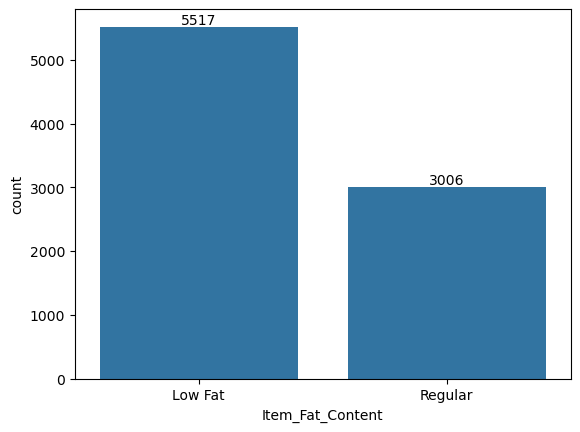

In [9]:
label=sns.countplot(x='Item_Fat_Content',data=train)
for i in label.containers:
    label.bar_label(i)

<Axes: ylabel='count'>

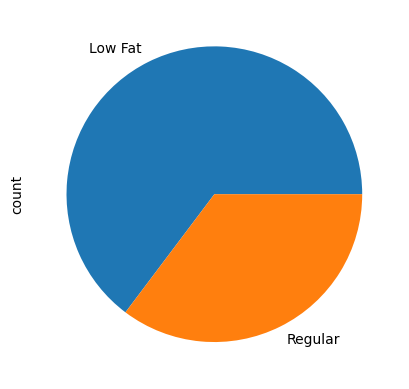

In [10]:
train['Item_Fat_Content'].value_counts().plot(kind='pie')

In [11]:
# create pie chart
#plt.figure(figsize=(6,6))
#plt.pie(train['Item_Fat_Content'].value_counts().values,
#labels=train['Item_Fat_Content'].index, autopct='%1.1f%%', startangle=[0.3,0.3])
#plt.title('Distribution of Item Fat Content')
#plt.legent(title='type',loc='upper right')
#plt.show()

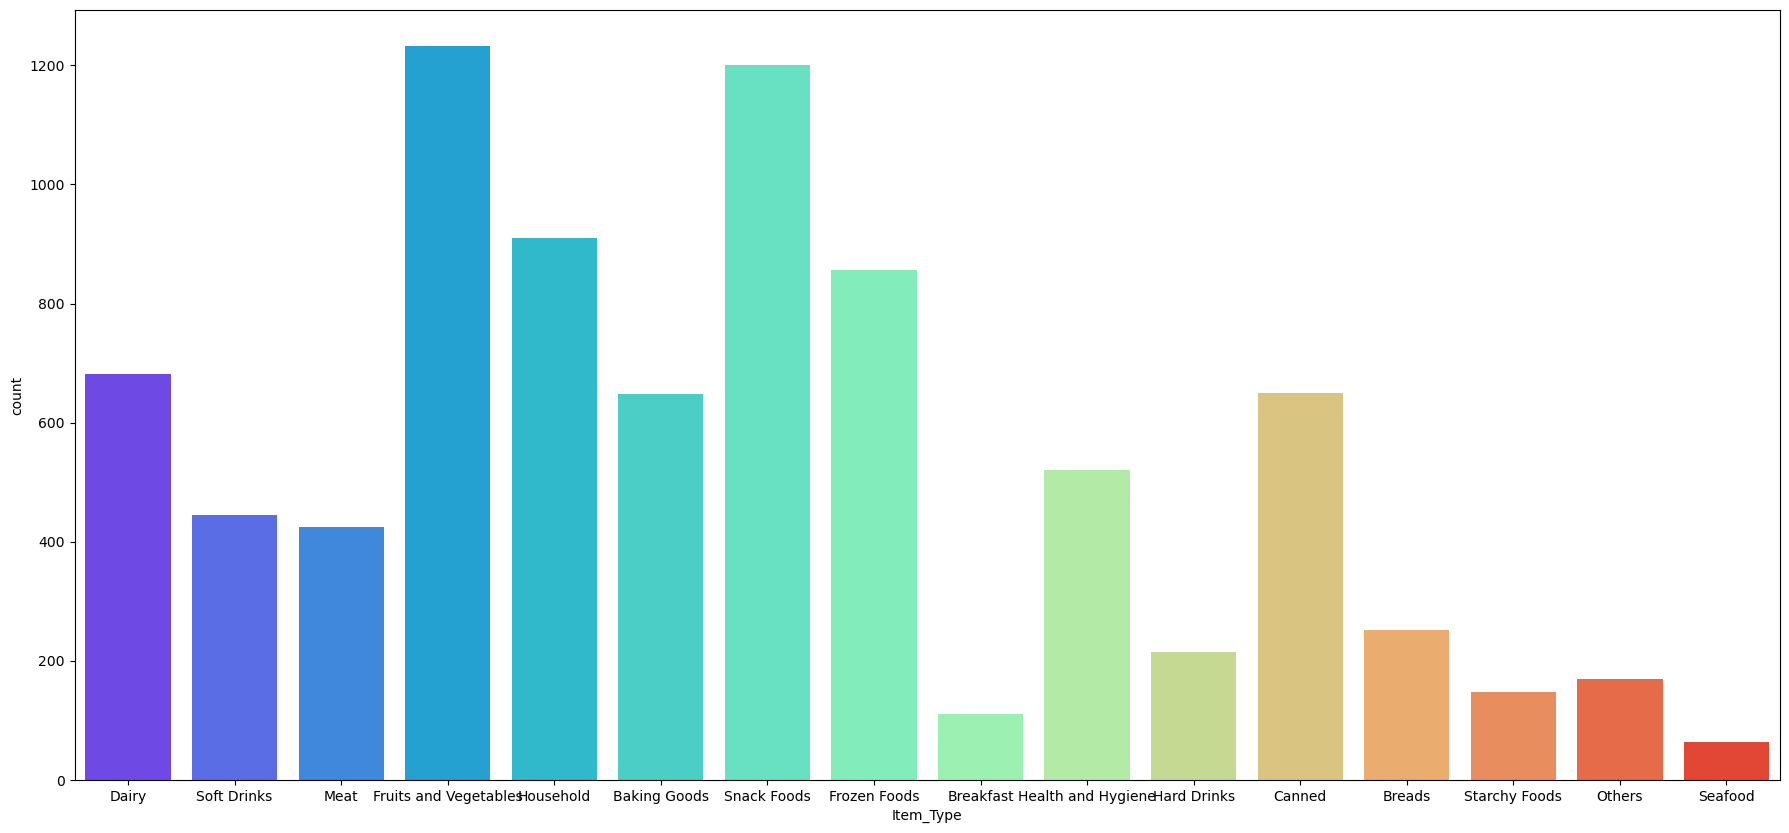

In [12]:
plt.figure(figsize=(22,10))
sns.countplot(x=train['Item_Type'],palette='rainbow')
plt.show()

In [13]:
train['Item_Type_Combined']=train['Item_Identifier'].apply(lambda x:x[0:2])    # item type combine
train ['Item_Type_Combined']=train['Item_Identifier'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drink'})
train['Item_Type_Combined'].value_counts()

Series([], Name: count, dtype: int64)

In [14]:
train.loc[train['Item_Type_Combined']=='Non-Consumable']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined


In [15]:
train.loc[train['Item_Type_Combined']=='Non-Consumable','Item_Fat_Content']='Non-Edible'

In [16]:
train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Type_Combined         0 non-null      object 
dtypes: float64(4), int64(1), object(8)
memory usage:

In [18]:
train['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

<Axes: xlabel='Outlet_Identifier', ylabel='count'>

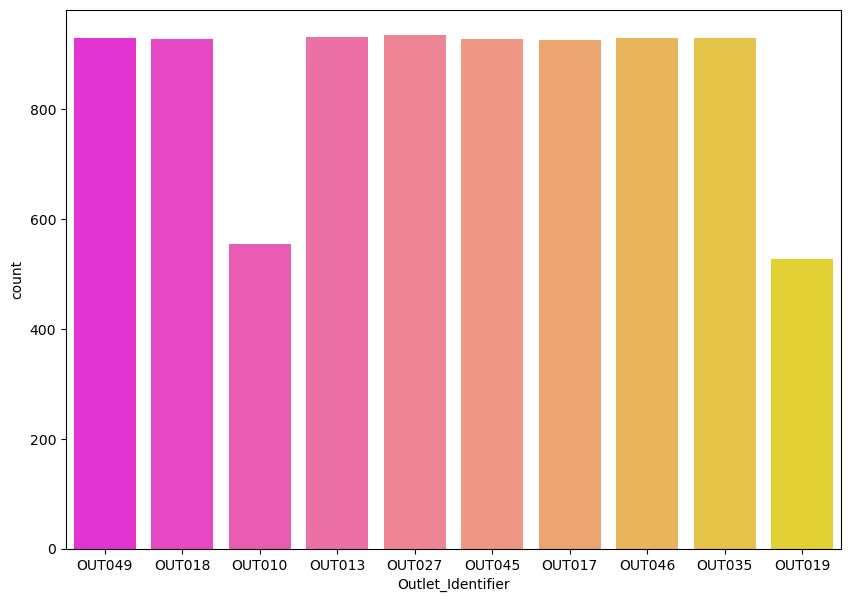

In [19]:
plt.figure(figsize=(10,7))
sns.countplot(x=train['Outlet_Identifier'],palette='spring')

In [20]:
train['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

In [21]:
train['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

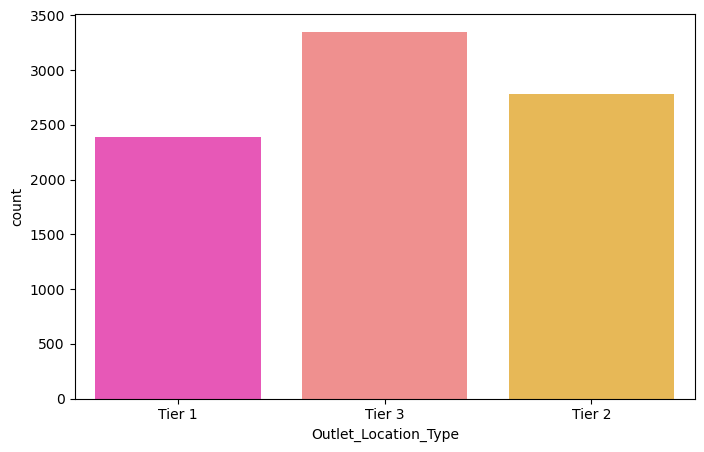

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x=train['Outlet_Location_Type'],palette='spring')

In [23]:
train['Item_Weight'].isnull().sum()

1463

In [24]:
train.groupby('Item_Type')['Item_Weight'].value_counts(dropna=False)


Item_Type      Item_Weight
Baking Goods   NaN            112
               9.800           15
               15.500          14
               17.750          14
               9.195           12
                             ... 
Starchy Foods  10.500           3
               14.000           3
               20.500           3
               21.200           3
               18.000           1
Name: count, Length: 1197, dtype: int64

In [25]:
train['Item_Weight']=train.groupby('Item_Type')['Item_Weight'].transform(lambda x:x.fillna(x.mean()))

In [26]:
train['Item_Weight'].isnull().sum()

0

In [27]:
train['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [28]:
train['Outlet_Size'].isna().sum()

2410

In [29]:
#train['Outlet_Size']=train.groupby('Item_Type')['Item_Weight'].transform(lambda x:x.fillna(x.mode()))

In [30]:
#train['Outlet_Size'].isnull().sum()

<Axes: xlabel='Outlet_Size', ylabel='count'>

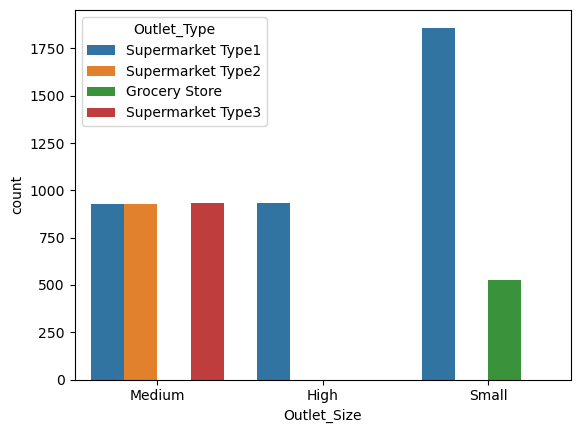

In [31]:
sns.countplot(x='Outlet_Size',hue='Outlet_Type',data=train)

In [32]:
# item visibility
train[train['Item_Visibility']==0]['Item_Identifier'].nunique()

446

In [33]:
# visual check thatthe 0 values in the fires 10 entries have been replaced
train['Item_Visibility']=train['Item_Visibility'].replace(0,np.nan)

In [34]:
train['Item_Visibility'].fillna(train['Item_Visibility'].median(),inplace=True)

In [35]:
train[train['Item_Visibility']==0]['Item_Identifier'].nunique()

0

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

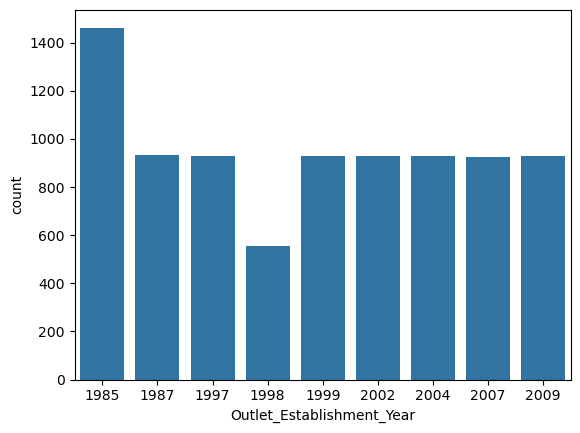

In [36]:
# outlet_establishment_year
sns.countplot(x=train['Outlet_Establishment_Year'])

In [37]:
train['Outlet_Age']=train['Outlet_Establishment_Year'].apply(lambda x:2013-x)

In [38]:
train['Outlet_Age'].head()

0    14
1     4
2    14
3    15
4    26
Name: Outlet_Age, dtype: int64

In [39]:
df=train.select_dtypes(exclude='object')
df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
0,9.300,0.016047,249.8092,1999,3735.1380,14
1,5.920,0.019278,48.2692,2009,443.4228,4
2,17.500,0.016760,141.6180,1999,2097.2700,14
3,19.200,0.057792,182.0950,1998,732.3800,15
4,8.930,0.057792,53.8614,1987,994.7052,26
...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,26
8519,8.380,0.046982,108.1570,2002,549.2850,11
8520,10.600,0.035186,85.1224,2004,1193.1136,9
8521,7.210,0.145221,103.1332,2009,1845.5976,4


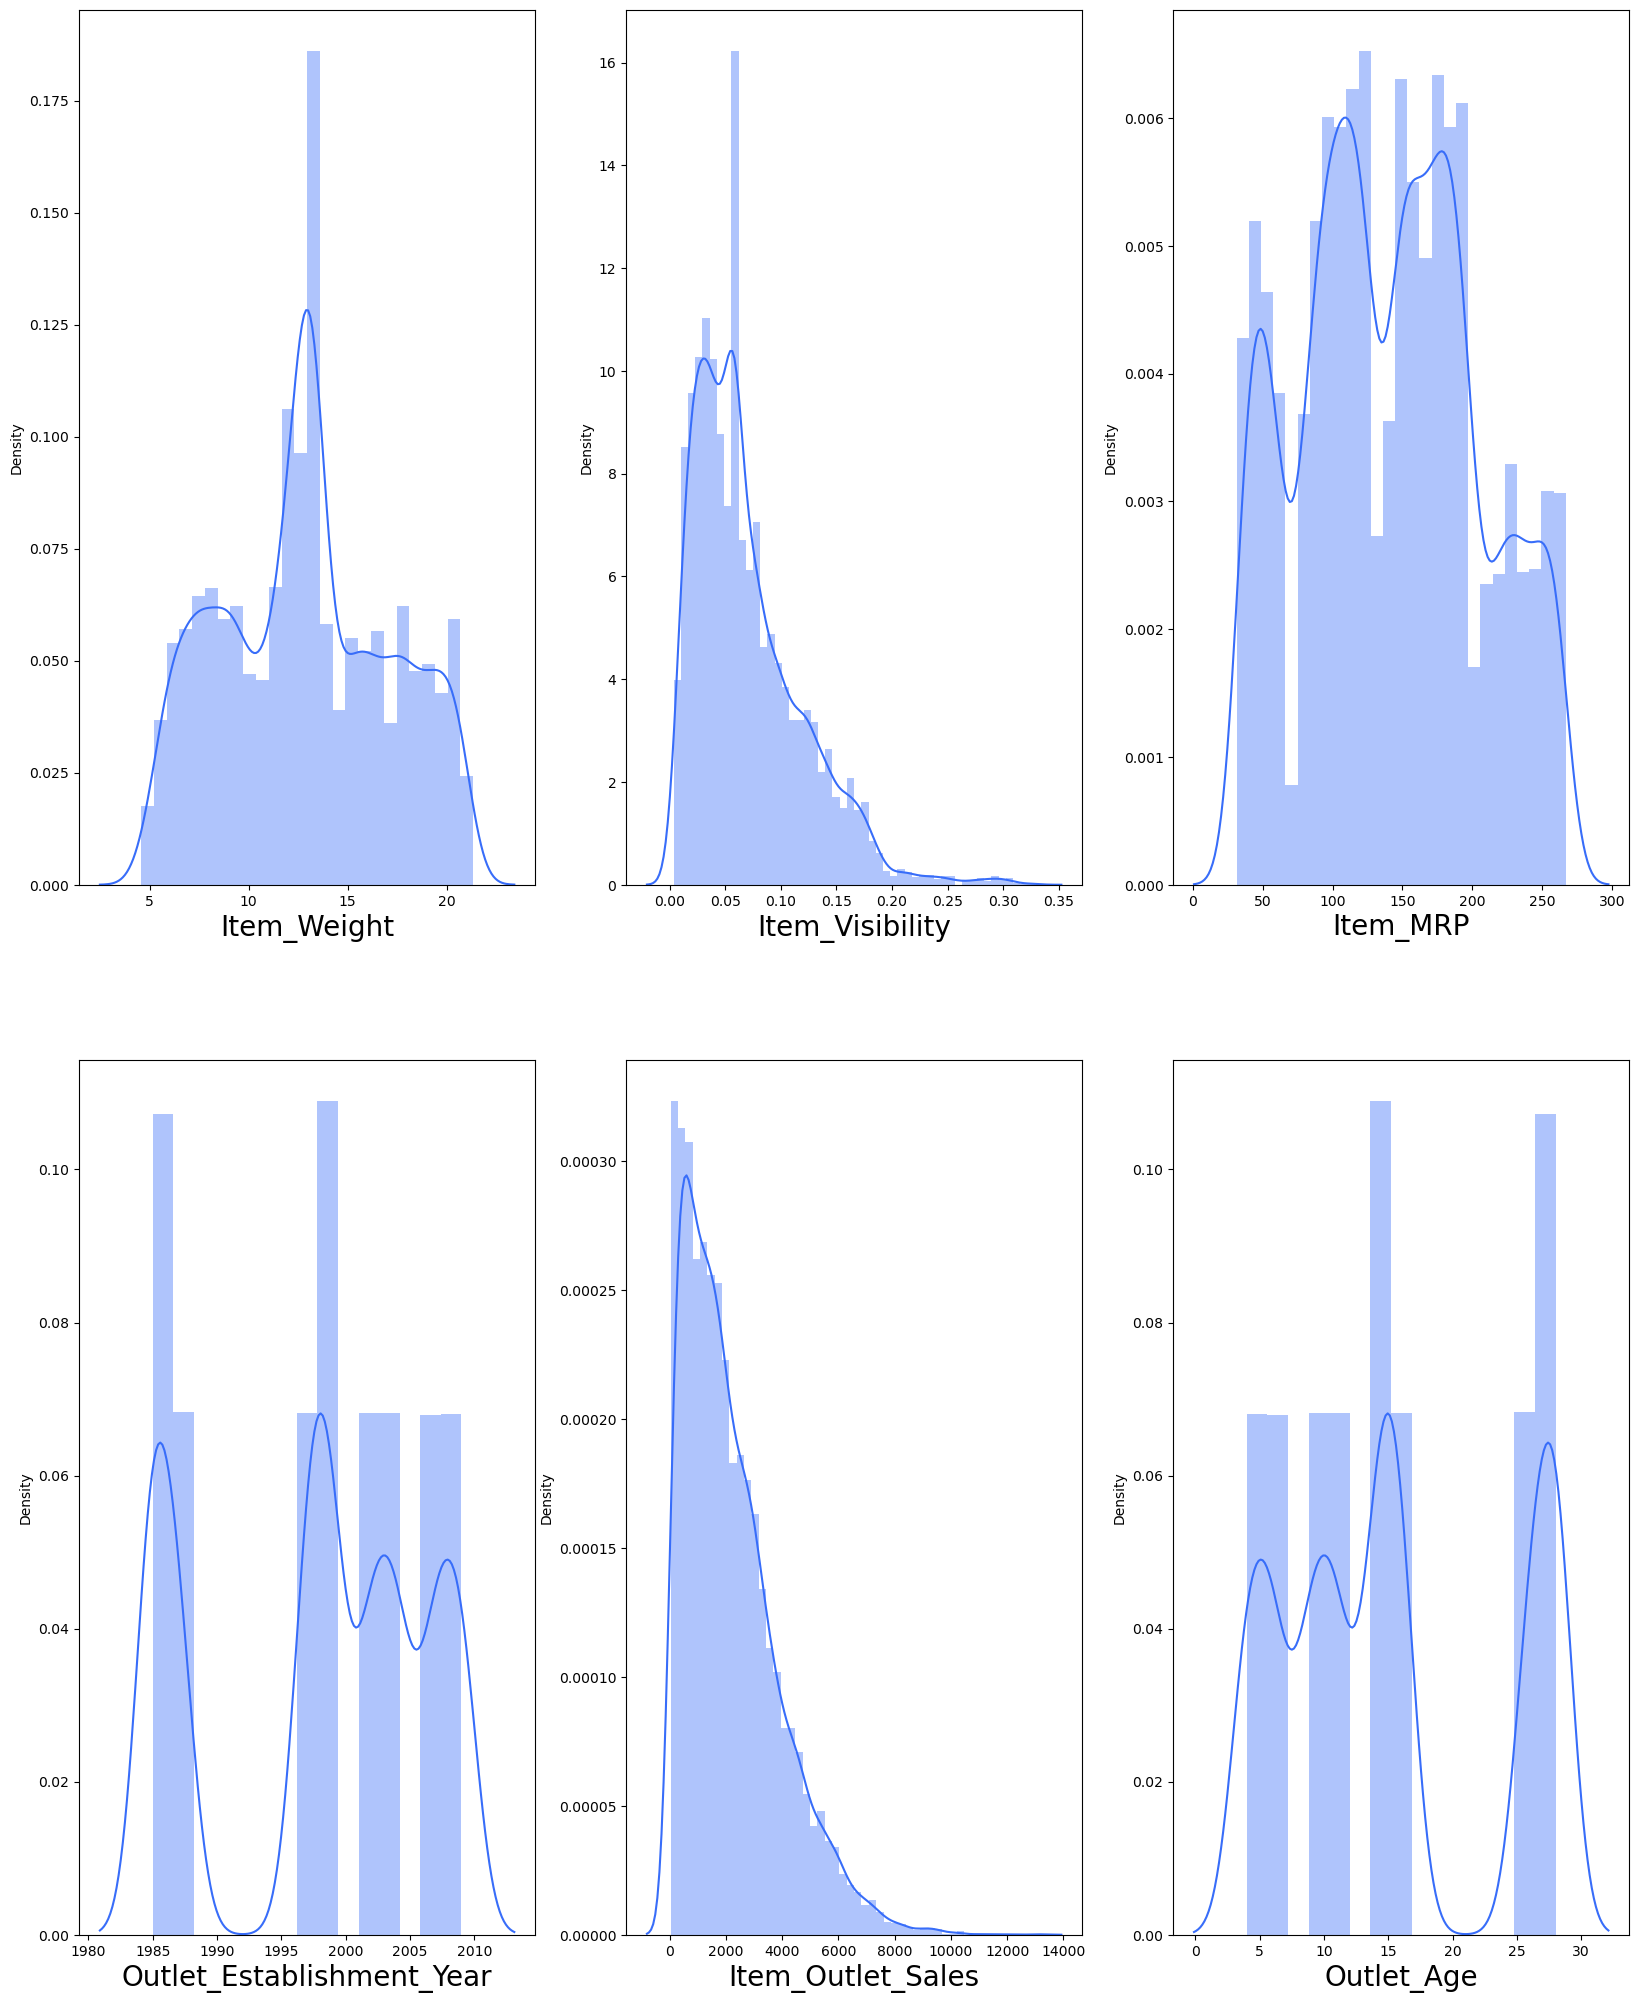

In [40]:
plt.figure(figsize=(20,25), facecolor='white')
sns.set_palette('rainbow')
plotnumber=1
for column in df:
    if plotnumber <=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        plotnumber+=1
plt.show()

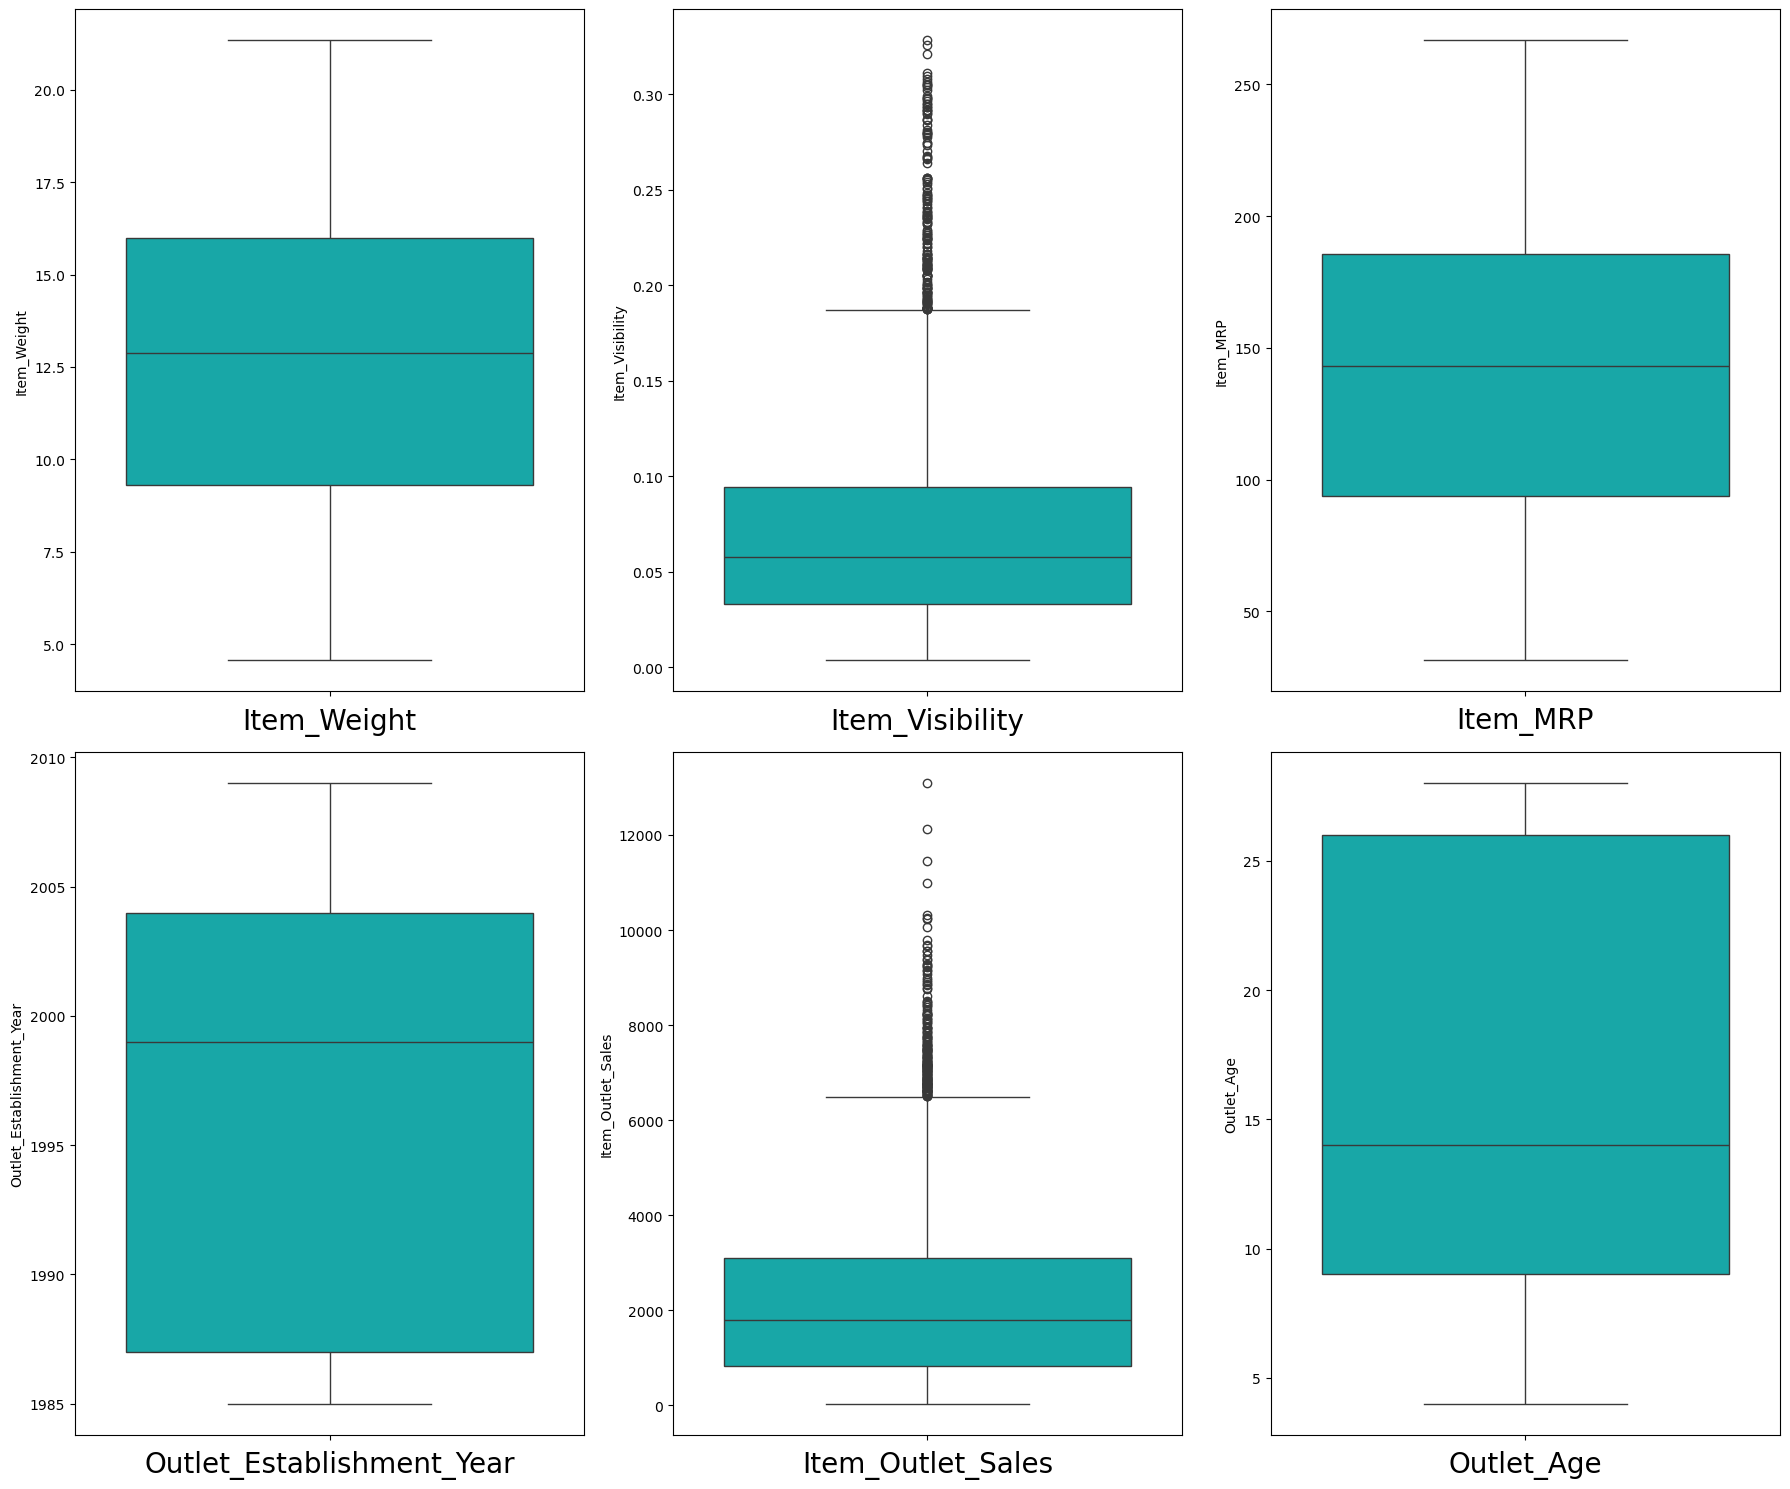

In [81]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column], color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

TypeError: pie() got an unexpected keyword argument 'radius'

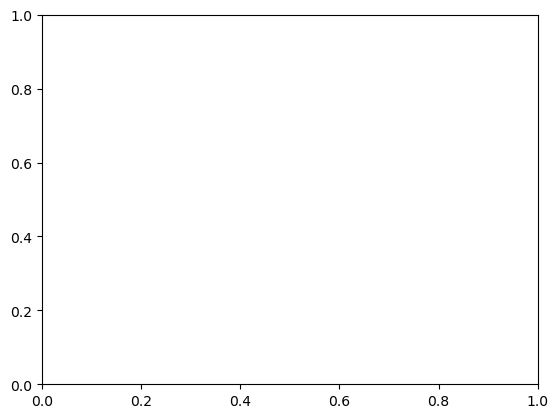

In [91]:
labels= 'Low Fat','Regular','Non-Edible'
fig, ax = plt.subplots()
px.pie(train.Item_Fat_Content.value_counts(),labels,radius =1,
       autopct = '%1.2f%%', shadow=True)
plt.show()

TypeError: pie() got an unexpected keyword argument 'radius'

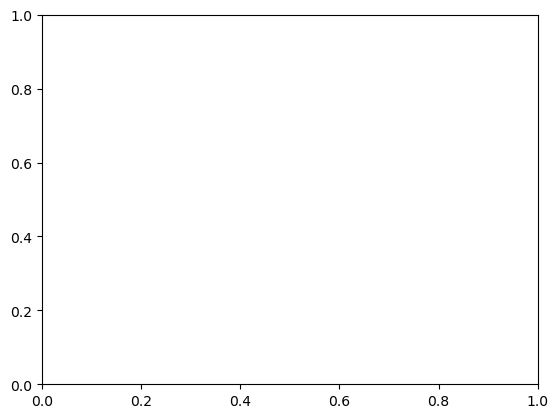

In [101]:
labels ='Medium','Small','High'
fig,ax =plt.subplots()
px.pie(train.Outlet_Size.value_counts(),labels,radius= 1,autopct= '%1.2f%%', shadow=True)
plt.show()

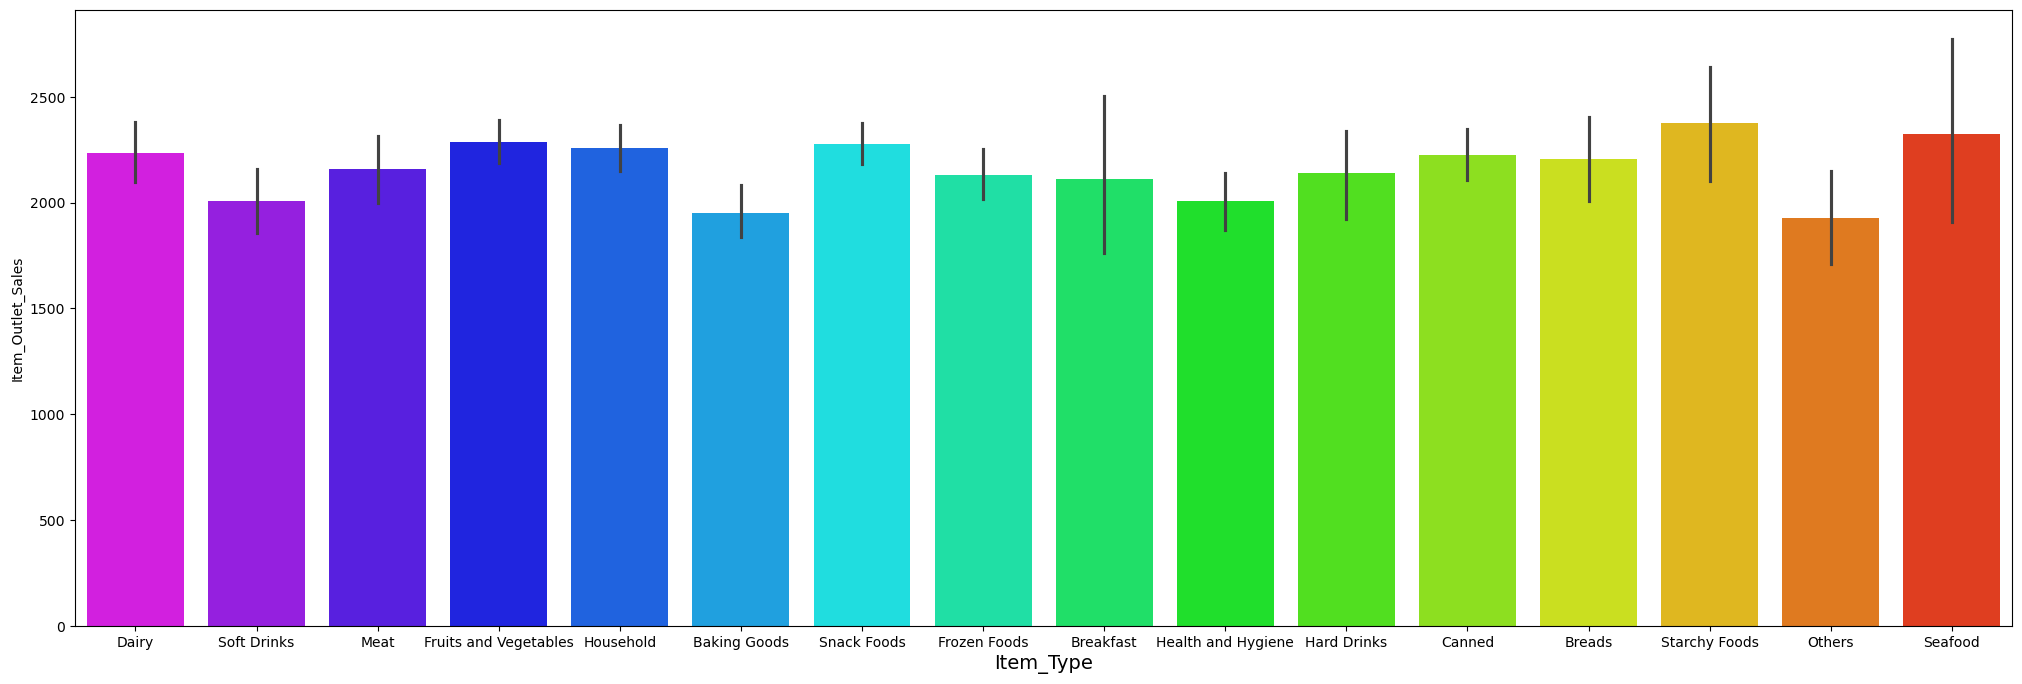

In [105]:
plt.figure(figsize=(25,8))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=train, palette='gist_rainbow_r')
plt.xlabel('Item_Type', fontsize=14)
plt.show()